In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


C:\Users\91783\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

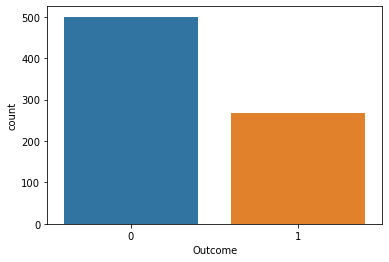

In [6]:
import seaborn as sns
sns.countplot(diabetes['Outcome'],label="Count")


In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    diabetes.loc[:, diabetes.columns != 'Outcome'],
    diabetes['Outcome'],
    stratify=diabetes['Outcome'],
    test_size=0.3,  # Set the test dataset size to 30%
    random_state=66
)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []


In [18]:
neighbors_settings = range(1, 11)

In [19]:
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))


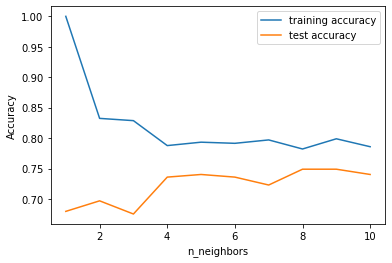

In [20]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


In [21]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.75


In [22]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[124  26]
 [ 32  49]]


In [23]:
# Assuming you have a new input data stored in a variable called 'new_input'
new_input = [[5, 130, 80, 40, 55, 33.2, 0.62, 35]]

# Make predictions using the trained model
prediction = knn.predict(new_input)

# Print the predicted outcome
if prediction[0] == 0:
    print("The model predicts that the person does not have diabetes.")
else:
    print("The model predicts that the person has diabetes.")

The model predicts that the person does not have diabetes.


C:\Users\91783\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [24]:
#using decision tree qualifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)



In [26]:
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.710


In [27]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.791
Accuracy on test set: 0.727


In [28]:
# Assuming you have a new input data stored in a variable called 'new_input'
new_input = [[5, 130, 80, 40, 55, 33.2, 0.62, 35]]

# Make predictions using the trained model
prediction = tree.predict(new_input)

# Print the predicted outcome
if prediction[0] == 0:
    print("The model predicts that the person does not have diabetes.")
else:
    print("The model predicts that the person has diabetes.")

The model predicts that the person has diabetes.


C:\Users\91783\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
